# Surrogate Primer Vector 

In this notebook we extend the theory outlined in the notebook on the [primer vector](<./primer_vector.ipynb>) to the case where we are adding simultaneously two impulses
to a trajectory where we can control one single existing impulse (as opposed to the original case where one adds only one impulse in a trajectory where two can be controlled).

While the developments are similar, please note that the index $k$ was before reserved to indicate the only node (of three, ijk) where no finite impulse was given. In this developments it indicates, instead, the only node (of three, ijk) where a finite impulse is given.

:::{note}
  The developments as well as the test case used are taken from the work from Bauregard, Acciarini and Izzo {cite:p}`beauregard`.
  The developments are shown in details as they can be extended to more generic cases that use different dynamics and number of impulses. The user must in that case provide the state ransition matrices and DVs on a time grid as constructed below.

  ## Theory and notation

  a) Consider the following definition of the State Transition Matrix, $\mathbf M_{fs}$:

  $$
  \mathbf M_{fs} := \frac{\partial \mathbf x_{f}}{\partial \mathbf x_{s}}
  $$

  Note how this definition does not depend on the dynamics. The STM allows to describe variations of the (final) state at $f$ as:

  $$
  \delta\mathbf x_f = \mathbf M_{fs} \delta \mathbf x_s
  $$

  We also make use of the following definitions for the various blocks of the STM:

  $$
  \mathbf M = \left[ 
  \begin{array}{c|c} 
    \mathbf M^{rr} & \mathbf M^{rv} \\ 
    \hline 
    \mathbf M^{vr} & \mathbf M^{vv} 
  \end{array} 
  \right] 
  = \left[ 
  \begin{array}{c|c} 
    \mathbf M^{xr} & \mathbf M^{xv} 
  \end{array} 
  \right] 
  = \left[ 
  \begin{array}{c} 
    \mathbf M^{rx} \\
    \hline 
    \mathbf M^{vx} 
  \end{array} 
  \right] 
  $$

  ---------------

b) Assume now to have a grid of $N$ points along a multiple impulse trajectory and pick three indexes $i,j,k$. 

We ask the following question: what happens when we add three small $\delta\Delta V$ at the selected nodes?

To answer this question, we compute the variation of the final state due to intermidiate variations at the nodes using the STMs:

$$
\delta \mathbf x_f = \mathbf M_{fi}\delta\mathbf x_i + \mathbf M_{fj}\delta\mathbf x_j + \mathbf M_{fk}\delta\mathbf x_k
$$

which we set to zero, as we do not want the trajectory boundary cnstraints to change, only find a better $\Delta V$:

$$
\mathbf 0 = \mathbf M_{fi}\delta\mathbf x_i + \mathbf M_{fj}\delta\mathbf x_j + \mathbf M_{fk}\delta\mathbf x_k
$$

which becomes (multiplying by $\mathbf M_{kf}$):

$$
\mathbf M_{ki}\delta\mathbf x_i + \mathbf M_{kj}\delta\mathbf x_j + \delta\mathbf x_k = \mathbf 0
$$

Note that, with respect to the derivations for the primer vector, we have now changed the reference node to $k$ for convenience.

-----------

c) The state variations $\delta\mathbf x$ are, in our case, consequence of three $\delta\Delta \mathbf V$, so that the previous equations becomes:

$$
\begin{align}
\mathbf M_i^{rv} \delta\Delta \mathbf V_i + \mathbf M_j^{rv} \delta\Delta \mathbf V_j = \mathbf 0\\
\mathbf M_i^{vv} \delta\Delta \mathbf V_i + \mathbf M_j^{vv} \delta\Delta \mathbf V_j + \delta\Delta \mathbf V_k = \mathbf 0\\
\end{align}
$$

solving for $\delta\Delta \mathbf V_i$ and $\delta\Delta \mathbf V_k$ (as a function of $j$ where one of the added impulses is present):

$$
\begin{align}
\delta\Delta \mathbf V_i &=& - (\mathbf M_i^{rv})^{-1}\mathbf M_j^{rv} \delta\Delta \mathbf V_j = \mathbf A_{ij}\delta\Delta \mathbf V_j\\
\delta\Delta \mathbf V_k &=& - \big(\mathbf M_i^{vv}\mathbf A_{ij} + \mathbf M_j^{vv} \big)  \delta\Delta \mathbf V_j = \mathbf A_{kj}\delta\Delta \mathbf V_j\\
\end{align}
$$

The matrices $\mathbf A$ are telling us how the three variations of impulsive velocity changes applied in ($i$, $j$, $k$) must be related for the overall trajectory to not change its boundary conditions (i.e. $\mathbf x_f = \mathbf 0$).

Note here that we chose to use the index $j$ as reference as we relate all others $\delta\Delta V$ to $\delta\Delta V_j$. It convenient to keep the chosen index as the one where no finite impulse is present.

-----------
d) So far the three indexes we picked (i.e. $i,j,k$) were equivalent, now we assume that in $i,j$ no finite $\Delta V$ is present. In $k$, instead, an additional $\Delta \mathbf V$ will exist.

The total magnitude of the $\Delta \mathbf V$ can then be expressed by:

$$
J = \Delta V_{tot} = \underbrace{|\mathbf V_k + \delta\Delta \mathbf V_k |}_{\text{finite impulse}} + \underbrace{|\delta\Delta \mathbf V_i| + |\delta\Delta \mathbf V_j|}_{\text{infinitesimal}}
$$

and its first order variation:

$$
\delta J = \frac{\Delta\mathbf V_k}{|\Delta \mathbf V_k|}\cdot \delta\Delta \mathbf V_k + |\delta\Delta \mathbf V_i| + |\delta\Delta \mathbf V_j|
$$

-----------

e) The surrogate primer vector

We introduce $\hat{\mathbf u} = \frac{\delta \Delta \mathbf V_j}{|\delta \Delta \mathbf V_j|}$ as the unit vector along the direction
of the infinitesimal $\delta \Delta V$ added in our reference node $j$. 

Substituting and regrouping we have:

$$
\delta J = |\delta\Delta \mathbf V_j| \left(1 +\mathbf A_{kj}^T\frac{\Delta\mathbf V_k}{|\Delta \mathbf V_k|} \cdot \hat {\mathbf u}
  + |\mathbf A_{ij}\hat {\mathbf u}|  \right)
$$

which we rewrite and rearrange as:

$$
\delta J = |\delta\Delta \mathbf V_j| \left(1 - (\mathbf b \cdot \hat {\mathbf u} - |\mathbf B\hat {\mathbf u}|  \right)
$$

where $\mathbf B:=\mathbf A_{ij}$, $\mathbf b = -\mathbf A_{kj}^T\frac{\Delta\mathbf V_k}{|\Delta \mathbf V_k|}$.

We now introduce the vectors:
$$
\boxed{\hat {\mathbf u}^* = \argmax_{|\hat {\mathbf u}|=1}\left(\mathbf b\cdot \hat {\mathbf u} - |\mathbf B\hat {\mathbf u}|\right)}
$$
and,
$$
\boxed{\tilde{\mathbf p} = (\mathbf b \cdot \hat {\mathbf u}^* - |\mathbf B\hat {\mathbf u}^*| ) \hat {\mathbf u}^*}
$$

which we call **surrogate primer vector**, since $\delta J = (1-|\tilde{\mathbf p}|) |\delta\Delta \mathbf V_j|$ as in the 
classical case where the **primer vector** $\mathbf p$ is introduced.

From the expression of $\delta J$ it appears clear that if we want to be able to decrease the overall $\Delta V$ adding in $i,j$ two
impulses, it is necessary for the norm of the surrogate primer vector (computed in $i,j$) to be larger than 1.

Enough of that, let us start coding now ...

In [1]:
import pykep as pk
import pygmo as pg
import numpy as np

np.set_printoptions(legacy="1.25")
import matplotlib.pyplot as plt

Let us define a toy problem. In the Keplerian dynamics, we define the following trajectory 

In [2]:
# Problem data
n_points = 50
r0 = np.array([1.0, 0.0, 0.0])
v0 = np.array([0.0, 1.0, 0.0])
DVk = np.array([0.6, -0.2, 0.0])
DVk_norm = np.linalg.norm(DVk)
t_grid = np.linspace(0, 4 * np.pi, n_points)

# DV is applied at the end
idx_k = n_points - 1

# We first work out the surrogate primer vector for the following j,k
idx_i = 10
idx_j = 20

Since the grid is uniform, and the DV is aplied at the end, we can compute all STMs in a single propagation.

In [3]:
retval = pk.propagate_lagrangian_grid([r0, v0], t_grid, mu=1., stm=True)
#retval1 = pk.propagate_lagrangian_grid(retval[0][0], np.flip(t_grid), mu=1., stm=True)
#retval1.reverse()
stm_n0 = [it[1] for it in retval] # Mn0

We may now loop over all possible positions for the indexes $i,j$ and compute the *surrogate primer vector* at each point.

In [4]:
norm_surrogate_p = np.ones((n_points, n_points))
p = np.ones((n_points, n_points))
for idx_i in range(n_points):
    Mk0 = stm_n0[idx_k]
    if idx_i == idx_k:
        continue
    Mki = Mk0 @ np.linalg.inv(stm_n0[idx_i])  # Mki = Mk0*M0i
    for idx_j in range(idx_i + 1, n_points):
        if idx_j == idx_k:
            continue
        Mkj = Mk0 @ np.linalg.inv(stm_n0[idx_j])  # Mkj = Mk0*M0j
        norm_surrogate_p[idx_j, idx_i] = np.linalg.norm(
            pk.trajopt.primer_vector_surrogate(DVk, Mki, Mkj)[0]
        )
        norm_surrogate_p[idx_i, idx_j] = -np.inf

Lets see what is its maximum value across all $i,j$:

In [5]:
idx1, idx2 = np.unravel_index(norm_surrogate_p.argmax(), norm_surrogate_p.shape)
print(
    f"The maximum value of the surrogate primer is attained when infinitesimal impulses are added at:")
print(f"t1: {t_grid[idx2]:.4f}  and t2: {t_grid[idx1]:.4f}")
print(f"Its norm is: {np.max(norm_surrogate_p):.4f}")
print(f"Larger then one! -> Trajectory can be improved")

The maximum value of the surrogate primer is attained when infinitesimal impulses are added at:
t1: 4.8727  and t2: 7.6937
Its norm is: 2.7366
Larger then one! -> Trajectory can be improved


Let us visualize the computed surrogate vector:

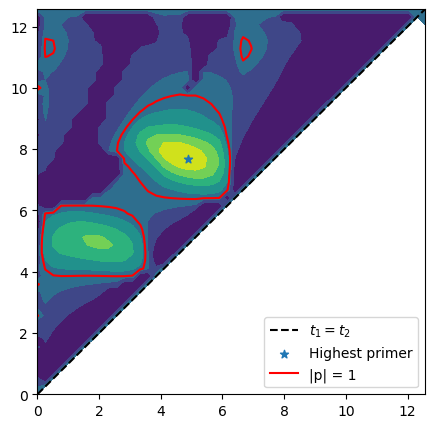

In [6]:
fig = plt.figure(figsize=(5,5))
X,Y = np.meshgrid(t_grid, t_grid)
plt.contourf(X,Y,norm_surrogate_p)
plt.contour(X,Y,norm_surrogate_p, [1], colors='r', linestyles='solid')
plt.plot(t_grid,t_grid, 'k--', label="$t_1=t_2$")
plt.scatter(t_grid[idx2], t_grid[idx1], label="Highest primer", marker="*")
plt.plot([],[], 'r', label="|p| = 1")
plt.legend(loc="lower right")

Revealing all areas where adding two impulses would improve the trajectory leaving all boundary conditions unchanged.

# But is it true?
Where we check that the transfer can indeed be improved using three impulses, and reaching identical conditions (initial-final) as the ones of our original trajectory (and in the same transfer time)

We thus build [on the fly] an optimization problem aimed at placing three impulses optimally between the initial and the end state. 

In [7]:
rf, vf = retval[-1][0]
vfd = [a + b for a, b in zip(vf, DVk)]

class my_udp:
    def __init__(self, posvel0):
        self.posvel0 = posvel0
    # x = [u1, v1, V1, u2, v2, V2, a1, a2, a3, a4]
    def decode(self, x):
        tofs = pk.alpha2direct(x[6:10], 4 * np.pi)
        # Up to the first impulse
        r1, v1 = pk.propagate_lagrangian(self.posvel0, tofs[0], 1.0, stm=False)
        # Add the first impulse
        DV1 = pk.uvV2cartesian(x[:3])
        v1d = [a + b for a, b in zip(v1, DV1)]
        # Up to the second impulse
        r2, v2 = pk.propagate_lagrangian([r1, v1d], tofs[1], 1.0, stm=False)
        # Add the second impulse
        DV2 = pk.uvV2cartesian(x[3:6])
        v2d = [a + b for a, b in zip(v2, DV2)]
        # Up to the third impulse
        r3, v3 = pk.propagate_lagrangian([r2, v2d], tofs[2], 1.0, stm=False)
        # Close with Lambert
        l = pk.lambert_problem(r3, rf, tofs[3], 1.0)
        DV3 = [a - b for a, b in zip(l.v0[0], v3)]
        DV4 = [a - b for a, b in zip(vfd, l.v1[0])]
        # Using the Multiple Impulsive Trajectory format (mit format)
        mit = [
            [self.posvel0, [0., 0., 0.], tofs[0]],
            [[r1, v1], DV1, tofs[1]],
            [[r2, v2], DV2, tofs[2]],
            [[r3, v3], DV3, tofs[3]],
            [[rf, vf], DV4, 0],
        ]
        return mit

    def fitness(self, x):
        mit = self.decode(x)
        norm_DVs = [np.linalg.norm(it[1]) for it in mit]
        return [sum(norm_DVs)]

    def get_bounds(self):
        lb = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1e-9, 1e-9, 1e-9, 1e-9]
        ub = [1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1 - 1e-9, 1 - 1e-9, 1 - 1e-9, 1 - 1e-9]
        return (lb, ub)

... and we solve it in multistart

In [8]:
def solve(udp, N=20):
    # We use CMA-ES 
    uda = pg.cmaes(4500, force_bounds=True, sigma0=0.5, ftol=1e-5)
    # But if you prefer a self adaptive version of differential evolution thats also OK.
    #uda = pg.sade(2500, ftol=1e-4, xtol=1e-4)
    algo = pg.algorithm(uda)
    print("Multi-start:")

    res = list()
    for i in range(N):
        pop = pg.population(udp, 20)
        pop = algo.evolve(pop)
        res.append([pop.champion_f, pop.champion_x])
        print(i, pop.champion_f[0], end= '\r')
        
    best_x = sorted(res, key =  lambda x: x[0][0])[0][1]
    best_f = udp.fitness(best_x)[0]

    print(f"\nThe best solution found has a DV of {best_f:.5e}")
    return best_x, best_f

udp = my_udp([r0,v0])
best_x, best_f = solve(udp, 1)


Multi-start:
0 0.3105382900601983
The best solution found has a DV of 3.10538e-01


We can now plot the trajectory found as a Multiple Impulsive Trajectory (mit).

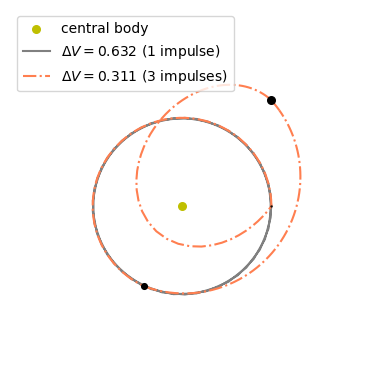

In [9]:
# Create the axis
ax = pk.plot.make_3Daxis()
# Adding the central body
pk.plot.add_sun(ax, label = "central body")
# Plotting the original trajectory (mono-impulsive)
ax.plot([it[0][0][0] for it in retval], [it[0][0][1] for it in retval], [it[0][0][2] for it in retval], 'gray', label=f'$\\Delta V = {DVk_norm:.3f}$ (1 impulse)')
# Plotting the mit
pk.plot.add_mit(ax, udp.decode(best_x), mu = 1., units = 1., c_segments=['coral'],linestyle="-.")

# Makin the plot prettier
ax.view_init(90,-90)
ax.set_axis_off()
from matplotlib.lines import Line2D
# access legend objects automatically created from data
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label=f'$\\Delta V = {best_f:.3f}$ (3 impulses)', color='coral', linestyle="-.")
plt.legend(handles=handles+[line], loc="upper left");

The **surrogate primer vector** correctly had us try to add impulses and, in this case, halved the needed $\Delta V$!